In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline 

In [2]:
dataf2 = pd.read_excel('dataf.xlsx')

In [3]:
dataf2 = dataf2.drop(['Unnamed: 0'], 1, inplace = False)

In [4]:
dataf2

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
0,2.33,2.47,2.25,200,26.38,127177.5,2.21,0,120511
1,2.28,1.46,1.57,200,24.31,131373.6,3.01,0,131846
2,1.53,1.37,1.23,200,23.58,138690.5,0.00,0,125162
3,0.92,1.38,0.97,240,24.90,141388.1,-3.89,0,130799
4,-0.26,0.99,0.61,240,26.38,139605.8,-0.87,0,126942
...,...,...,...,...,...,...,...,...,...
216,2.58,0.27,0.25,1100,1.81,650694.2,2.38,1528758,180904
217,2.53,0.82,0.86,1100,1.57,673362.3,0.25,1346528,186718
218,2.94,0.86,0.93,1100,2.43,723966.1,10.53,2197488,208801
219,1.51,0.38,0.31,1100,2.55,682431.7,34.66,1910264,191853


## RNA

In [73]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from math import sqrt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = dataf2.iloc[:,:-1]
y = dataf2['Unidades Vendidas'].values


escala= StandardScaler()
escala.fit(X)

X_norm = escala.transform(X)


X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm,y,test_size=0.2,random_state=0)

In [57]:
rna = MLPRegressor(hidden_layer_sizes=(10,2,2),max_iter=20000,
                   tol=0.0000001,
                   learning_rate_init=0.1,
                   solver='lbfgs',
                   activation='relu',
                   learning_rate='constant',
                    verbose=2)

rna.fit(X_norm_train,Y_train)

Y_rna_pred = rna.predict(X_norm_test)

score = sqrt(mean_squared_error(Y_test,Y_rna_pred))
print(int(score))

21917


In [58]:
Y_rna_treino = rna.predict(X_norm_train)

In [59]:
r2rna = r2_score(Y_test,Y_rna_pred)
r2rnatreino = r2_score(Y_train,Y_rna_treino)
scoretreino = sqrt(mean_squared_error(Y_train,Y_rna_treino))

In [76]:
print(' Dados teste RNA: \n    R2 Score:', r2rna,'\n','   RMSE',score)
print('\n')    
print(' Dados treino RNA: \n   R2 Score:', r2rnatreino,'\n','  RMSE',scoretreino)

 Dados teste RNA: 
    R2 Score: 0.8319349408063694 
    RMSE 21917.74560936672


 Dados treino RNA: 
   R2 Score: 0.9192296475611197 
   RMSE 14783.50347686789


Text(0.5, 1.0, 'RNA:MLP - Real X Previsto - Dados novos')

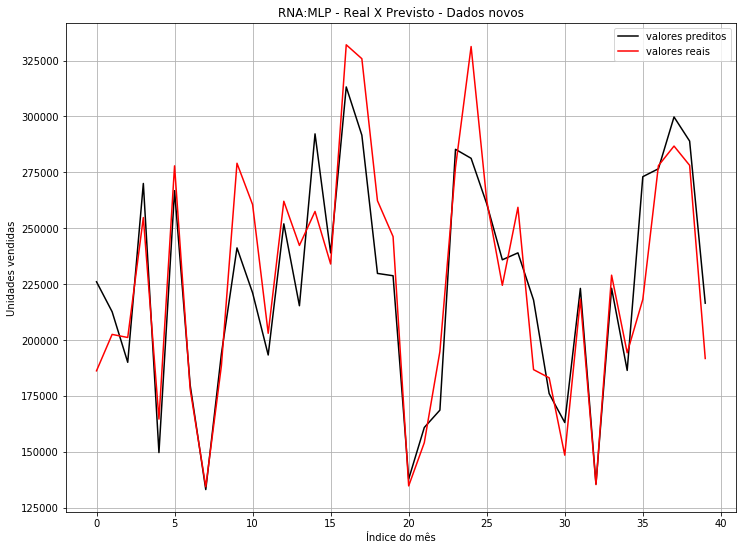

In [75]:
plt.rcParams['figure.figsize'] = (12,9)
plt.plot(Y_rna_pred[5:300],'-',color='black',label='valores preditos')
plt.plot(Y_test[5:300],'-',color='red',label='valores reais')
plt.grid(True)
plt.legend()
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('RNA:MLP - Real X Previsto - Dados novos')

Text(0.5, 1.0, 'RNA:MLP - Real X Previsto - Dados históricos')

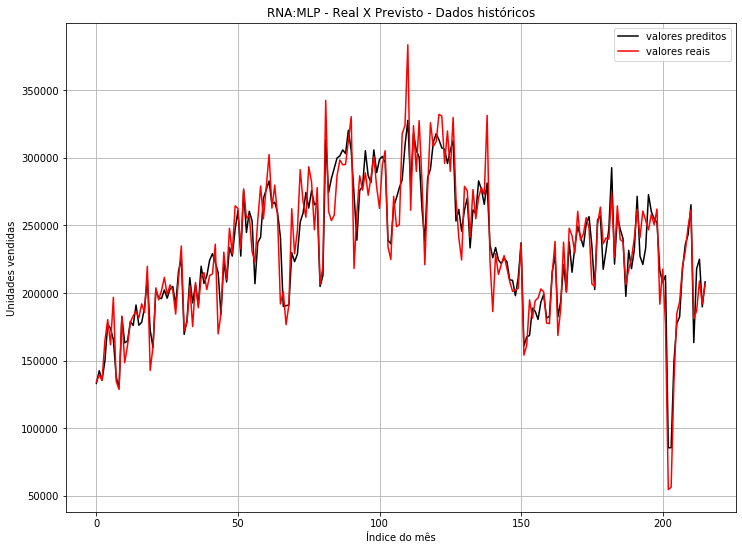

In [74]:
Yrnaprednorm = rna.predict(X_norm)
plt.rcParams['figure.figsize'] = (12,9)
plt.plot(Yrnaprednorm[5:300],'-',color='black',label='valores preditos')
plt.plot(y[5:300],'-',color='red',label='valores reais')
plt.grid(True)
plt.legend()
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('RNA:MLP - Real X Previsto - Dados históricos')

In [61]:
import pickle
with open ('2melhordomelhordomodelo_rna.ipynb','wb') as file:
    pickle.dump(rna, file)

# Fazendo previsoes com dados simulados

In [62]:
import pickle

with open('2melhordomelhordomodelo_rna.ipynb', 'rb') as f:
    model = pickle.load(f)

In [63]:
y_rna_treino_import= model.predict(X_norm_train)
r3rnatreino = r2_score(Y_train,y_rna_treino_import)
scoretreino2 = sqrt(mean_squared_error(Y_train,y_rna_treino_import))

In [64]:
print(' Dados treino RNA: \n    R2 Score:', r3rnatreino,'\n','   RMSE',scoretreino2)
print('\n')    

 Dados treino RNA: 
    R2 Score: 0.9192296475611197 
    RMSE 14783.50347686789




In [65]:
projecoes = pd.read_excel('projecoes.xlsx')

In [66]:
projecoes

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid
0,2.33,2.47,2.25,1100,26.38,127177.5,3.21,120000
1,2.28,1.46,1.57,1100,24.31,131373.6,3.01,130000
2,2.00,0.25,1.23,1100,23.58,138690.5,0.00,154222
3,0.92,1.38,0.80,1100,24.90,141388.1,-3.89,56555
4,-0.26,0.99,0.61,1100,26.00,139605.8,2.54,80254
5,-1.00,0.04,0.50,1100,24.75,137993.4,-1.55,45620
6,0.50,0.08,0.20,1100,24.00,145970.6,-2.40,52550
7,0.38,0.18,0.35,1100,23.43,144819.4,-2.39,152000
8,2.00,0.80,0.78,1100,23.00,148559.8,3.57,52555
9,0.25,0.39,0.50,1100,21.56,154925.9,0.90,65222


In [67]:
Xx = projecoes.iloc[:,:8]
escala= StandardScaler()
escala.fit(Xx)

X_norm = escala.transform(Xx)

In [68]:
prj = model.predict(X_norm)

In [69]:
prj

array([ 85521.11085592,  85521.11085592, 136785.98252986, 245986.66083938,
       227674.86834377, 279363.43680967, 347794.01482009, 171209.07111968,
       431932.45379932, 470211.7122497 , 468434.51858198])

Text(0.5, 1.0, 'Random Forest - Real X Previsto - Dados novos')

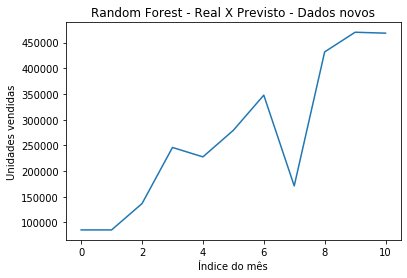

In [70]:
plt.plot(prj)
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('Random Forest - Real X Previsto - Dados novos')